# Introduction to Natural Language Processing: Assignment 3

In this exercise we'll practice features extraction using SpaCy as well as multiclass text classification using the word embedding technique.

- You can use built-in Python packages, spaCy, scikit-learn, Numpy and Pandas.
- Please comment your code
- Submissions are due Tuesdays at 23:59 **only** on eCampus: **Assignmnets >> Student Submissions >> Assignment 3 (Deadline: 05.12.2023, at 23:59)**

- Name the file aproppriately: "Assignment_3_\<Your_Name\>.ipynb" and submit only the Jupyter Notebook file.
- Please use relative path, your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = bbc-news.csv, **DON'T use:** /Users/ComputerName/Username/Documents/.../bbc-news.csv

### Task 1 (2 points)

Write a function `extract_proper_nouns(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a list containing all proper nouns with more than one token.

**Example:**

text = "Honk Kong and Japan are two countries in Asia and New York is the largest city in the world"

return = `["New York", "Hong Kong"]` **(Note: it should not return "Japan")**

In [10]:
# download 'en_core_web_sm'
import spacy

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
def extract_proper_nouns(file):
    with open(file, "r") as f:
        text = f.read()

    # get all proper nouns
    doc = nlp(text)

    pos = [tok.i for tok in doc if tok.pos_ == "PROPN"]
    consecutives = []
    current = []
    for elt in pos:
        if len(current) == 0:
            current.append(elt)
        else:
            if current[-1] == elt - 1:
                current.append(elt)
            else:
                consecutives.append(current)
                current = [elt]
    if len(current) != 0:
        consecutives.append(current)

    proper_nouns = [doc[consecutive[0]:consecutive[-1]+1] for consecutive in consecutives]

    # remove proper nouns with only one token
    proper_nouns_multi = [proper_noun for proper_noun in proper_nouns if len(proper_noun) > 1]
    return proper_nouns_multi


print(extract_proper_nouns("example_1.txt"))

[Honk Kong, New York]


### Task 2 (4 points)

Write a function `common_lemma(my_file_name)` that takes a file name (my_file_name.txt) as input and returns a Python dictionary with lemmas as `key` and the `value` that should contain a list with both verbs and nouns sharing the same lemma.

**Examples:**

1.
text = "When users google for a word or any query, their system internally runs a pipeline in order to process what the person is querying."

return = `{"query": ["query", "querying"]}`

2.
text = I really loved the movie and show, the movie was showing reality but it showed sometimes nonesense!

return = `{"show": ["show", "showing", "showed"]}` **(Note: it should not return "movie" because both "movie"s are NOUN)**

In [15]:
def common_lemma(my_file_name):
    tokens_with_common_lemma = {}
    # here comes your code

    with open(my_file_name, "r") as f:
        text = f.read()

    doc = nlp(text)
    for token in doc:
        if token.lemma_ not in tokens_with_common_lemma.keys():
            tokens_with_common_lemma[token.lemma_] = [token.text]
        else:
            if token.text not in tokens_with_common_lemma[token.lemma_]:
                tokens_with_common_lemma[token.lemma_].append(token.text)

    # remove lemmas with only one token
    for key in list(tokens_with_common_lemma.keys()):
        if len(tokens_with_common_lemma[key]) == 1:
            del tokens_with_common_lemma[key]

    return(tokens_with_common_lemma)

print(common_lemma("example_2_1.txt"))
print(common_lemma("example_2_2.txt"))

{'query': ['query', 'querying']}
{'show': ['show', 'showing', 'showed']}


### Task 3 (1 point)

a) Load the data `bbc-text.csv`; This datata consists of 2225 documents from the BBC news website corresponding to stories from 2004-2005.

In [16]:
# Here comes your code

with open('bbc-news.csv', 'r') as f:
    bbc_news = f.read()

print(len(bbc_news))

5057493


### Task 4 (1 point)

a) Show how many articles we have for each topical area (class label) in the dataset using a plot.

In [1]:
# Here comes your code

import pandas as pd

df = pd.read_csv("bbc-news.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


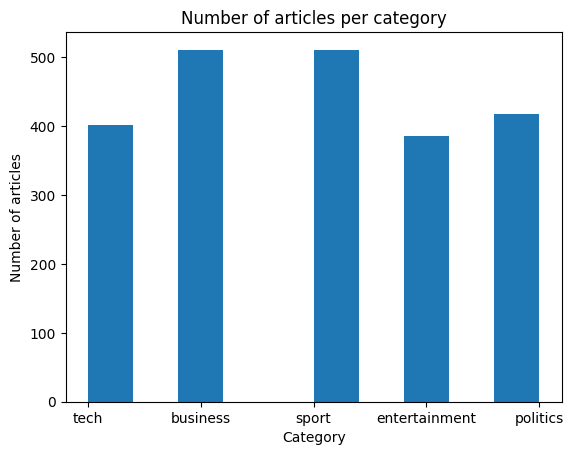

In [3]:
import matplotlib.pyplot as plt

plt.hist(df.category)
plt.title("Number of articles per category")
plt.xlabel("Category")
plt.ylabel("Number of articles")

plt.show()

### Task 5 (2 point)

Preprocessing: Define two following functions and apply them to the dataset:
1. Remove punctuation
2. Remove any numbers

In [8]:
import string

def remove_punctuation(corpus):
    # Here comes your code

    cleaned_corpus = corpus
    for punctuation in string.punctuation:
        cleaned_corpus = cleaned_corpus.replace(punctuation, "")

    return cleaned_corpus

def remove_numbers(corpus):
    # Here comes your code

    cleaned_corpus = corpus
    for number in string.digits:
        cleaned_corpus = cleaned_corpus.replace(number, "")
    return cleaned_corpus

### Task 6 (4 points)

a) Load the **large model trained on the web text** provided by spaCy. (`en_core_web_lg`)

b) Split the data into trainng and test set (70% and 30%) using scikit-learn, shuffle it, and set the `seed=101 (random_state)`.

c) Convert each article in your data splits to a vector representation using the pre-trained spaCy model. (**Hint:** It should be stored as an array)

**NOTE:** If working with this dataset is not computationaly possible for you, you can work only with a subset of the dataset (i.e., the first 1000 rows) and use only the first 150 tokens for each article. You should point this out in your code.

In [ ]:
# Here comes your code

### Task 7 (6 points)

a) Using the vectors from Task 6, train 3 different models provided by scikit-learn. (**Note:** One of the models must be `MLPClassifier`)

b) Evaluate the classifiers on the test set and report the accuracy and confusion matrix. (**Hint:** You should build a confusion matrix for multi-class classification)

In [ ]:
# Here comes your code